#GEN AI PRACTICAL 9 :  Generate high-resolution human-like faces from random latent vectors

In [ ]:
!git clone https://github.com/NVlabs/stylegan2-ada-pytorch.git
%cd stylegan2-ada-pytorch


Cloning into 'stylegan2-ada-pytorch'...
remote: Enumerating objects: 131, done.
remote: Counting objects: 100% (2/2), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 131 (delta 0), reused 0 (delta 0), pack-reused 129 (from 2)
Receiving objects: 100% (131/131), 1.13 MiB | 3.76 MiB/s, done.
Resolving deltas: 100% (57/57), done.
/content/stylegan2/stylegan2/stylegan2-ada-pytorch/stylegan2-ada-pytorch


In [ ]:
!pip install requests pillow


In [ ]:
!wget https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl


--2025-11-11 05:34:06--  https://nvlabs-fi-cdn.nvidia.com/stylegan2-ada-pytorch/pretrained/ffhq.pkl
Resolving nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)... 99.84.215.108, 99.84.215.98, 99.84.215.96, ...
Connecting to nvlabs-fi-cdn.nvidia.com (nvlabs-fi-cdn.nvidia.com)|99.84.215.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 381624121 (364M) [binary/octet-stream]
Saving to: ‘ffhq.pkl’

ffhq.pkl            100%[===================>] 363.94M  9.96MB/s    in 25s     

2025-11-11 05:34:31 (14.5 MB/s) - ‘ffhq.pkl’ saved [381624121/381624121]



Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!
Setting up PyTorch plugin "upfirdn2d_plugin"... Failed!


/content/stylegan2/stylegan2/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py:34: UserWarning: Failed to build CUDA kernels for upfirdn2d. Falling back to slow reference implementation. Details:

Traceback (most recent call last):
  File "/content/stylegan2/stylegan2/stylegan2-ada-pytorch/torch_utils/ops/upfirdn2d.py", line 32, in _init
    _plugin = custom_ops.get_plugin('upfirdn2d_plugin', sources=sources, extra_cuda_cflags=['--use_fast_math'])
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/content/stylegan2/stylegan2/stylegan2-ada-pytorch/torch_utils/custom_ops.py", line 110, in get_plugin
    torch.utils.cpp_extension.load(name=module_name, verbose=verbose_build, sources=sources, **build_kwargs)
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_extension.py", line 1681, in load
    return _jit_compile(
           ^^^^^^^^^^^^^
  File "/usr/local/lib/python3.12/dist-packages/torch/utils/cpp_ext

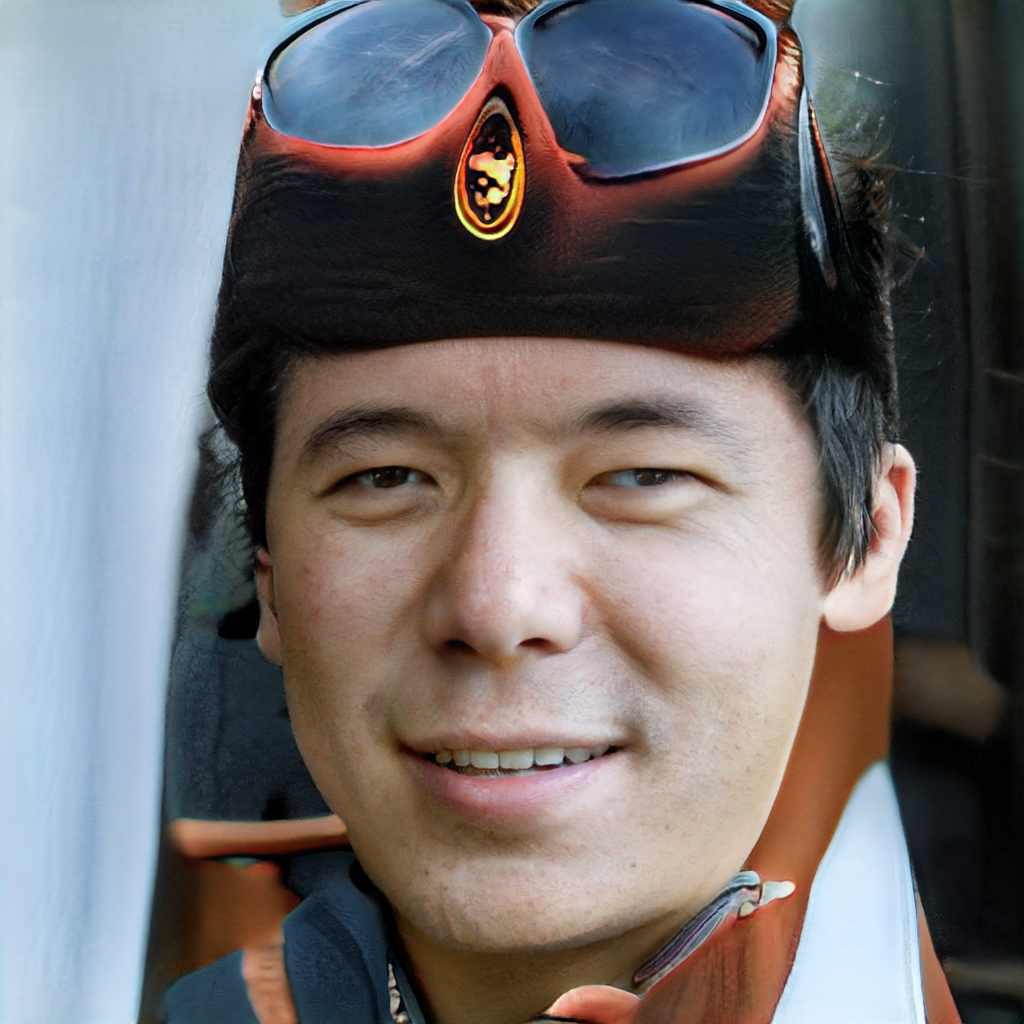

In [ ]:
import torch
import numpy as np
from PIL import Image
import dnnlib
import legacy

device = torch.device('cuda')

network_path = "./ffhq.pkl"

with open(network_path, 'rb') as f:
    G = legacy.load_network_pkl(f)['G_ema'].to(device)

z = torch.randn(1, G.z_dim, device=device)
img = G(z, None)

# Convert format
img = (img * 127.5 + 127.5).clamp(0,255).to(torch.uint8)
img = img[0].permute(1, 2, 0).cpu().numpy()

Image.fromarray(img).save("generated_face.png")
Image.fromarray(img)
